In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline

#read dataset
dataset_path = r"C:\mbti_1.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False, encoding='cp1252')
#create new columns
df.columns = ['label', 'text']

#print head of Dataset
df.head()

b'Skipping line 171: expected 2 fields, saw 23\nSkipping line 6103: expected 2 fields, saw 4\n'


,label,text
0,ENTP,'I'm finding the lack of me in these posts ver...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,ENTJ,'You're fired.|||That's another silly misconce...
4,INTJ,'18/37 @.@|||Science is not perfect. No scien...


In [2]:
#word counts
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
#words per comment
df['words_comment'] = df['text'].apply(lambda x: len(x.split())/50)
#variance of word counts
df['variance_word_counts'] = df['text'].apply(lambda x: var_row(x))
#print head of Dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 4 columns):
label                   8672 non-null object
text                    8672 non-null object
words_comment           8672 non-null float64
variance_word_counts    8672 non-null float64
dtypes: float64(2), object(2)
memory usage: 271.1+ KB


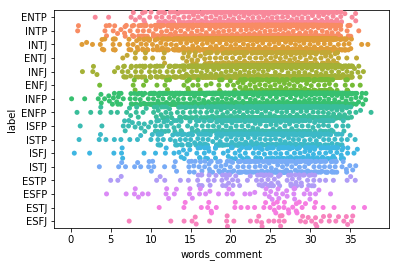

In [3]:
#print swarmplot
sns.swarmplot(x="words_comment", y="label", data=df)

In [4]:
df.groupby('label').agg({'label':'count'})

,label
label,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1469


In [5]:
#Create new df aux
dfaux=df.copy()
#http per comment
dfaux['http_comment'] = dfaux['text'].apply(lambda x: x.count('http')/50)
#points per comment
dfaux['points_comment'] = dfaux['text'].apply(lambda x: x.count('...')/50)
#question per comment
dfaux['question_comment'] = dfaux['text'].apply(lambda x: x.count('?')/50)
#exclamation per comment
dfaux['exclamation_comment'] = dfaux['text'].apply(lambda x: x.count('!')/50)
#caret per comment
dfaux['caret_comment'] = dfaux['text'].apply(lambda x: x.count('^')/50)
#wink emoji per comment
dfaux['emojiwink_comment'] = dfaux['text'].apply(lambda x: x.count(';)')/50)
#smile emoji per comment
dfaux['emojismile_comment'] = dfaux['text'].apply(lambda x: x.count(':)')/50)
#plus smile emoji per comment
dfaux['emojismilep_comment'] = dfaux['text'].apply(lambda x: x.count(':D')/50)
#plusp smile emoji per comment
dfaux['emojismilepp_comment'] = dfaux['text'].apply(lambda x: x.count(':-)')/50)

dfaux.head()

,label,text,words_comment,variance_word_counts,http_comment,points_comment,question_comment,exclamation_comment,caret_comment,emojiwink_comment,emojismile_comment,emojismilep_comment,emojismilepp_comment
0,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.38,0.10,0.00,0.0,0.00,0.10,0.18,0.0
1,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.26,0.24,0.08,0.0,0.00,0.14,0.04,0.0
2,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.52,0.22,0.06,0.0,0.00,0.00,0.00,0.0
3,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.42,0.20,0.02,0.0,0.02,0.00,0.00,0.0
4,INTJ,'18/37 @.@|||Science is not perfect. No scien...,29.82,97.7200,0.02,0.78,0.20,0.00,0.0,0.00,0.00,0.00,0.0


In [6]:
print(dfaux.groupby('label').agg({'http_comment': 'mean'}))
print(dfaux.groupby('label').agg({'points_comment': 'mean'}))
print(dfaux.groupby('label').agg({'question_comment': 'mean'}))
print(dfaux.groupby('label').agg({'exclamation_comment': 'mean'}))
print(dfaux.groupby('label').agg({'caret_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojiwink_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismile_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilep_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilepp_comment': 'mean'}))

       http_comment
label              
ENFJ       0.053263
ENFP       0.050459
ENTJ       0.053160
ENTP       0.048263
ESFJ       0.027143
ESFP       0.055417
ESTJ       0.052821
ESTP       0.064719
INFJ       0.065596
INFP       0.075426
INTJ       0.063596
INTP       0.070790
ISFJ       0.070602
ISFP       0.088339
ISTJ       0.061171
ISTP       0.081009
       points_comment
label                
ENFJ         0.744421
ENFP         0.715881
ENTJ         0.646667
ENTP         0.631036
ESFJ         0.638571
ESFP         0.533750
ESTJ         0.630769
ESTP         0.577528
INFJ         0.721715
INFP         0.676594
INTJ         0.631083
INTP         0.632510
ISFJ         0.661446
ISFP         0.596162
ISTJ         0.638341
ISTP         0.586944
       question_comment
label                  
ENFJ           0.220632
ENFP           0.236178
ENTJ           0.250303
ENTP           0.224204
ESFJ           0.176190
ESFP           0.242917
ESTJ           0.209744
ESTP           0.247640
INFJ

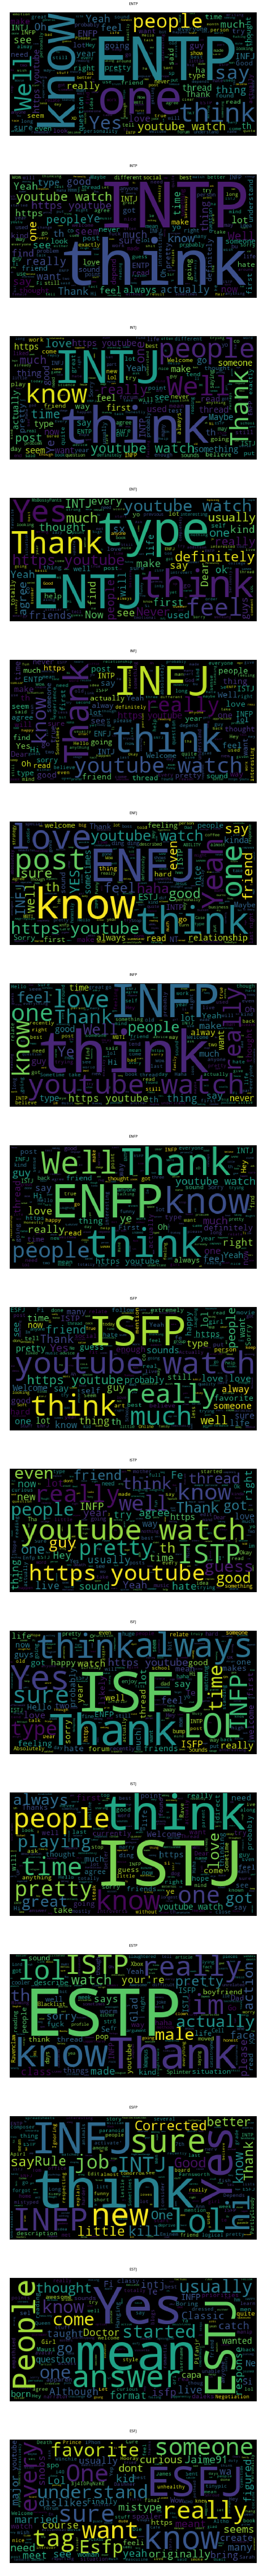

In [8]:
import os
os.path
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['label'].unique()), sharex=True, figsize=(15,10*len(df['label'].unique())))

k = 0
for i in df['label'].unique():
    df_4 = df[df['label'] == i]
    wordcloud = WordCloud().generate(df_4['text'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1